<a href="https://colab.research.google.com/github/dangcaptkd/CS114.K21-/blob/master/lab06_my_first_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names = names)

In [0]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


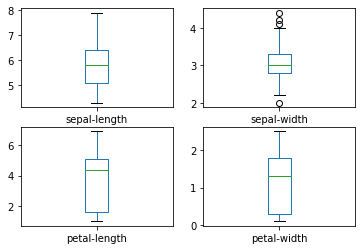

In [0]:
data.plot(kind='box',subplots=True, layout=(2,2))
plt.show()

In [0]:
dataset = data.values
features = dataset[:,:4]
labels = dataset[:,4]

In [0]:
print(features.shape)
print(labels.shape)

(150, 4)
(150,)


In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.8, test_size=0.2)

In [0]:
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('K-NearestNeighbors', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SupportVectorMachines', SVC(gamma='auto')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
#models.append(('RandomForest', RandomForestRegressor()))

In [10]:
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, features_train, labels_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogisticRegression: 0.950000 (0.066667)
K-NearestNeighbors: 0.941667 (0.053359)
DecisionTree: 0.941667 (0.038188)
GNB: 0.941667 (0.053359)
SupportVectorMachines: 0.975000 (0.038188)
LinearDiscriminantAnalysis: 0.975000 (0.038188)


In [12]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(features_train, labels_train)
pred = model_KNN.predict(features_test)
print('acc', accuracy_score(labels_test, pred))

acc 1.0


In [0]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(features_train, labels_train)
pred = model_LDA.predict(features_test)
print('acc', accuracy_score(labels_test, pred))

acc 0.9666666666666667


In [0]:
model_DT = DecisionTreeClassifier()
model_DT.fit(features_train, labels_train)
pred = model_DT.predict(features_test)
print('acc', accuracy_score(labels_test, pred))

acc 0.9666666666666667


In [0]:
model_LR = LogisticRegression(solver='liblinear',multi_class='ovr')
model_LR.fit(features_train, labels_train)
pred = model_LR.predict(features_test)
print('acc', accuracy_score(labels_test, pred))

acc 0.9666666666666667
